# Clustering

Dalam industri retail, salah satu yang sering dilakukan para analisis bisnis adalah pembuatan **market segmentation** (segmentasi pasar/segmentasi pelanggan) yang pada dasarnya adalah memilah pelanggan ke dalam kelompok-kelompok yang memiliki kesamaan tersendiri. Kelompok bisa dibentuk berdasarkan demografi, pola pembelian, geografis, dan sebagainya.

![Market segmentation](https://global-uploads.webflow.com/6185b708a2657014268d2eaf/61f7eee9e38a87a43bb21954_market-segmentation-940x610.jpeg)

Dengan dibuatnya kelompok-kelompok (segmen) pelanggan, proses pemasaran dapat lebih terarah dan menyasar ke segmen pelanggan yang tepat. Contohnya sebuah perusahaan alat kecantikan dapat memasang iklan khusus ke segmen pelanggan wanita usia tertentu saja, sehingga tidak perlu mengeluarkan biaya iklan untuk segmen yang lain.

*Clustering* adalah proses membagi data ke dalam beberapa **cluster** (kelompok yang isinya mirip) dengan melihat kesamaan antardata. *CLustering* sifatnya bukan prediksi (memperkirakan masa depan), namun lebih bersifat **knowledge discovery**, yaitu melihat apa yang telah terjadi.

Ada banyak penerapan yang umum terkait clustering. Selain segmentasi pelanggan, kita bisa juga melakukan deteksi perilaku yang tidak umum, misalnya transaksi perbankan yang polanya ada di luar cluster yang ada.

---
## Algoritma K-Means

Salah satu metode clustering yang sering dipakai adakah **K-Means Clustering**. K-Means banyak digunakan karena sifatnya yang cukup sederhana dan mudah dipahami, namun efektif bisa menemukan cluster di dalam data secara tepat.

Prinsip dasar dari K-Means adalah melakukan proses iteratif untuk menggeser **centroid**, yaitu suatu titik imajiner di dalam setiap *cluster* agar letaknya tepat ada di titik tengah cluster. Titik-titik data kemudian dipasangkan dengan centroid terdekat. Proses penggeseran centroid dilakukan berkali-kali hingga diperoleh posisi centroid yang stanil, kemudian kita anggap pembentukan cluster pun selesai.

K-means bertujuan agar kita mendapatkan sejumlah cluster yang isinya sebisa mungkin homogen (seragam). Sejalan dengan itu, kita ingin mendapatkan sekumpulan cluster yang sejauh mungkin berbeda satu sama lain, sehingga batas antar-cluster juga menjadi lebih jelas.

Mengapa disebut K-Means? K adalah suatu konstanta yang menentukan jumlah centroid, yang berarti juga sama dengan jumlah cluster yang akan dibentuk. Kita bisa memilih berapa saja angka k. Umumnya, semakin banyak cluster yang dibentuk, maka masing-masing cluster akan semakin homogen, adapun begitu pada saat yang sama ini akan meningkatkan resiko model menjadi *overfit*, yaitu tidak bisa membuat prediksi yang akurat ketika dihadapkan dengan data-data baru.

Menentukan angka k yang terlalu tinggi juga memiliki konsekuensi, yaitu proses komputasi yang menjadi terlalu berat dan memakanwaktu lama. Tidak ada rumus baku untuk menentukan berapa angka yang tepat untuk menentukan angka k, umumnya ini ditentukan berdasarkan konteks permasalahan yang dihadapi.

Lebih jelasnya, berikut langkah-langkah algoritma K-Means:
- Buat centroid sebanyak k dan tentukan posisi awal secara acak.
- Tentukan cluster yang sesuai untuk setiap titik data dengan cara menghitung centroid yang jaraknya terdekat.
- Geser centroid ke posisi bar dengan menghitung jarak rata-rata setiap titik di dalam cluster.
- Hitung ulang jarak tap titik data ke semua centroid, dan masukkan titik data ke cluster baru bilamana perlu.
- Ulangi langkah 3 sampai 5 hingga suatu kriteria terpenuhi dan posisi centroid sudah bisa dianggap stabil.

Penentuan angka k ini sendiri sebenarnya merupakan satu proses eksperimental yang bisa membawa kita menemukan pola-pola baru yang menarik. Dengan "memainkan" angka k, kita bisa mengamati bagaimana batas-batas cluster ikut berubah. Cluster yang sudah homogen akan sedikit saja berubah meskipun angka k dinaikkan, sementara cluster yang karakteristiknya tidak (atau kurang) homogen akan berubah lebih banyak.

### Elbow Method

Ada metode Khusus untuk memperkirakan angka k yang optimal yang disebut **elbow method**. Pada prinsipnya metode ini mengukur seberapa homogen masing-masing cluster ketika angka k dinaikkan, kemudian menemukan titik di mana peningkatan angka k tidak lagi menghasilkan cluster yang lebih homogen secara signifikan dibanding sebelumnya. Titik yang dicari ini disebut **elbow point** karena bila kurvanya digambar di sebuah grafik, titik ini akan nampak seperti siku tangan manusia seperti pada gambar di bawah ini.

![Elbow method](https://www.oreilly.com/api/v2/epubs/9781788295758/files/assets/995b8b58-06f1-4884-a2a1-f3648428e947.png)

## Case Study-1

Akan dilakukan segmentasi pelanggan penerbangan, menganalisis karakteristik kategori pelanggan yang berbeda, membandingkan nilai pelanggan dari kategori pelanggan yang berbeda, memberikan layanan yang dipersonalisasi untuk kategori pelanggan dengan nilai yang berbeda, dan merumuskan strategi pemasaran yang sesuai.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/Won/Library/CloudStorage/OneDrive-UGM365/Self-course/Data Mining/intro to ML Book/ch10/flight.csv')

In [3]:
df

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER    WORK_CITY  \
0          54993  11/2/2006        12/24/2008    Male         6            .   
1          28065  2/19/2007          8/3/2007    Male         6          NaN   
2          55106   2/1/2007         8/30/2007    Male         6            .   
3          21189  8/22/2008         8/23/2008    Male         5  Los Angeles   
4          39546  4/10/2009         4/15/2009    Male         6      guiyang   
...          ...        ...               ...     ...       ...          ...   
62983      18375  5/20/2011          6/5/2013  Female         4    guangzhou   
62984      36041   3/8/2010         9/14/2013    Male         4       foshan   
62985      45690  3/30/2006         12/2/2006  Female         4    guangzhou   
62986      61027   2/6/2013         2/14/2013  Female         4    guangzhou   
62987      61340  2/17/2013         2/17/2013  Female         4     shanghai   

      WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  ...  SUM_YR_2  SEG_KM_SUM  \
0           beijing           CN  31.0  3/31/2014  ...  234188.0      580717   
1           beijing           CN  42.0  3/31/2014  ...  167434.0      293678   
2           beijing           CN  40.0  3/31/2014  ...  164982.0      283712   
3                CA           US  64.0  3/31/2014  ...  125500.0      281336   
4           guizhou           CN  48.0  3/31/2014  ...  130702.0      309928   
...             ...          ...   ...        ...  ...       ...         ...   
62983     guangdong           CN  25.0  3/31/2014  ...       0.0        1134   
62984     guangdong           CN  38.0  3/31/2014  ...       0.0        8016   
62985     guangdong           CN  43.0  3/31/2014  ...       0.0        2594   
62986     guangdong           CN  36.0  3/31/2014  ...       0.0        3934   
62987             .           CN  29.0  3/31/2014  ...       0.0        4222   

       LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL MAX_INTERVAL  \
0             3/31/2014            1      3.483254           18   
1             3/25/2014            7      5.194245           17   
2             3/21/2014           11      5.298507           18   
3            12/26/2013           97     27.863636           73   
4             3/27/2014            5      4.788079           47   
...                 ...          ...           ...          ...   
62983          6/9/2013          297      4.000000            4   
62984          1/3/2014           89     37.000000           60   
62985          3/3/2014           29    166.000000          166   
62986         2/26/2013          400     12.000000           12   
62987         2/23/2013          403      6.000000            6   

       EXCHANGE_COUNT  avg_discount  Points_Sum  Point_NotFlight  
0                  34      0.961639      619760               50  
1                  29      1.252314      415768               33  
2                  20      1.254676      406361               26  
3                  11      1.090870      372204               12  
4                  27      0.970658      338813               39  
...               ...           ...         ...              ...  
62983               1      0.000000       12318               22  
62984              14      0.000000      106972               43  
62985               0      0.000000           0                0  
62986               0      0.000000           0                0  
62987               0      0.000000           0                0  

[62988 rows x 23 columns]

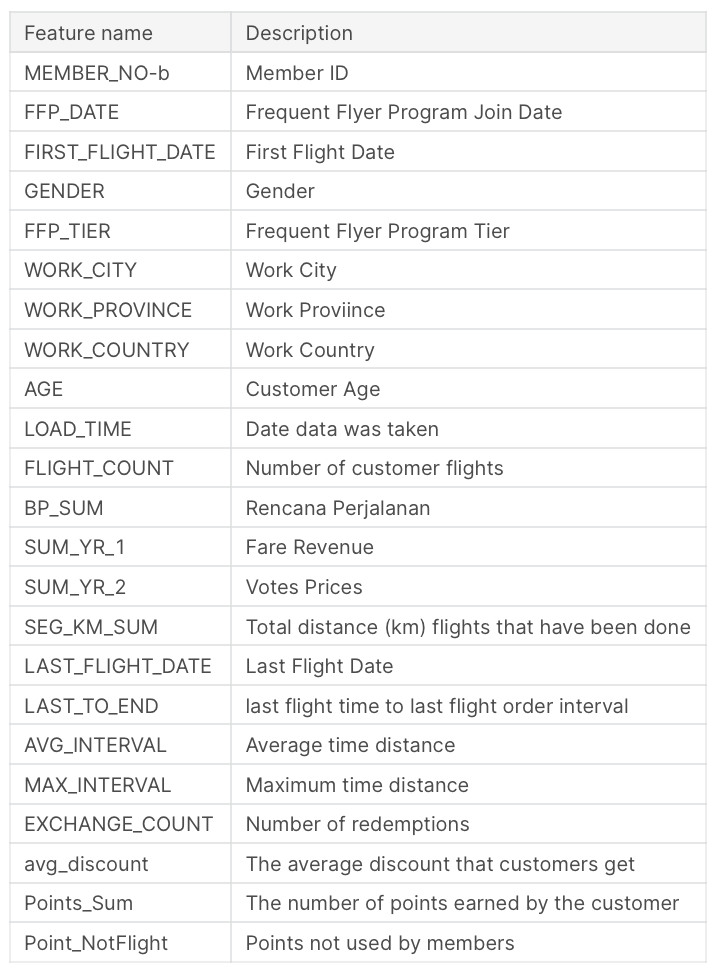

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [5]:
#Numeric
numeric = df.loc[:, (df.dtypes == int) | (df.dtypes == float)].columns.tolist()
numeric

['MEMBER_NO',
 'FFP_TIER',
 'AGE',
 'FLIGHT_COUNT',
 'BP_SUM',
 'SUM_YR_1',
 'SUM_YR_2',
 'SEG_KM_SUM',
 'LAST_TO_END',
 'AVG_INTERVAL',
 'MAX_INTERVAL',
 'EXCHANGE_COUNT',
 'avg_discount',
 'Points_Sum',
 'Point_NotFlight']

In [6]:
df[numeric].describe()

MEMBER_NO      FFP_TIER           AGE  FLIGHT_COUNT         BP_SUM  \
count  62988.000000  62988.000000  62568.000000  62988.000000   62988.000000   
mean   31494.500000      4.102162     42.476346     11.839414   10925.081254   
std    18183.213715      0.373856      9.885915     14.049471   16339.486151   
min        1.000000      4.000000      6.000000      2.000000       0.000000   
25%    15747.750000      4.000000     35.000000      3.000000    2518.000000   
50%    31494.500000      4.000000     41.000000      7.000000    5700.000000   
75%    47241.250000      4.000000     48.000000     15.000000   12831.000000   
max    62988.000000      6.000000    110.000000    213.000000  505308.000000   

            SUM_YR_1       SUM_YR_2     SEG_KM_SUM   LAST_TO_END  \
count   62437.000000   62850.000000   62988.000000  62988.000000   
mean     5355.376064    5604.026014   17123.878691    176.120102   
std      8109.450147    8703.364247   20960.844623    183.822223   
min         0.000000       0.000000     368.000000      1.000000   
25%      1003.000000     780.000000    4747.000000     29.000000   
50%      2800.000000    2773.000000    9994.000000    108.000000   
75%      6574.000000    6845.750000   21271.250000    268.000000   
max    239560.000000  234188.000000  580717.000000    731.000000   

       AVG_INTERVAL  MAX_INTERVAL  EXCHANGE_COUNT  avg_discount   Points_Sum  \
count  62988.000000  62988.000000    62988.000000  62988.000000   62988.0000   
mean      67.749788    166.033895        0.319775      0.721558   12545.7771   
std       77.517866    123.397180        1.136004      0.185427   20507.8167   
min        0.000000      0.000000        0.000000      0.000000       0.0000   
25%       23.370370     79.000000        0.000000      0.611997    2775.0000   
50%       44.666667    143.000000        0.000000      0.711856    6328.5000   
75%       82.000000    228.000000        0.000000      0.809476   14302.5000   
max      728.000000    728.000000       46.000000      1.500000  985572.0000   

       Point_NotFlight  
count     62988.000000  
mean          2.728155  
std           7.364164  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           1.000000  
max         140.000000

Beberapa pengamatan dari ringkasan statistik kolom numerik di atas:

- Terdapat 15 kolom numerik

- Untuk kolom MEMBER_NO, FFP_TIER dan avg_discount tampaknya memiliki distribusi normal dengan nilai rata-rata sama dengan/dekat dengan median

- Selain itu, sebagian besar kolom tampaknya memiliki distribusi miring secara positif (Mean > Median). Mungkin ada pencilan

- Terlihat ada harga tarif dengan nilai 0. Itu bisa dilihat di kolom SUM_YR_1 dan SUM_YR_2. Perlu dianalisis lebih lanjut

- Terlihat ada diskon rata-rata 0. Itu bisa dilihat di kolom avg_discount. Perlu dianalisis lebih lanjut

- Terlihat ada pelanggan yang berusia 110 tahun. Itu bisa dilihat di kolom AGE. Sepertinya bisa dihapus karena tidak normal

In [7]:
#Categorical
categorical = df.loc[:, (df.dtypes != int) & (df.dtypes != float)].columns.tolist()
categorical

['FFP_DATE',
 'FIRST_FLIGHT_DATE',
 'GENDER',
 'WORK_CITY',
 'WORK_PROVINCE',
 'WORK_COUNTRY',
 'LOAD_TIME',
 'LAST_FLIGHT_DATE']

In [8]:
df[categorical].describe()

FFP_DATE FIRST_FLIGHT_DATE GENDER  WORK_CITY WORK_PROVINCE  \
count       62988             62988  62985      60719         59740   
unique       3068              3406      2       3234          1165   
top     1/13/2011         2/16/2013   Male  guangzhou     guangdong   
freq          184                96  48134       9386         17509   

       WORK_COUNTRY  LOAD_TIME LAST_FLIGHT_DATE  
count         62962      62988            62988  
unique          118          1              731  
top              CN  3/31/2014        3/31/2014  
freq          57748      62988              959

Beberapa pengamatan dari ringkasan statistik kolom kategoris di atas:

- Sebanyak 8 kolom kategori

- Mayoritas pelanggan adalah Pria dengan frekuensi 48.134

- Mayoritas kolom memiliki jumlah unik yang besar, kecuali kolom GENDER

- Dilihat dari kolom LOAD_TIME, kumpulan data ini diambil pada 31-3-2014, dapat digunakan sebagai tanggal batas

## Data Pre-Processing

In [9]:
df_clean = df.copy()

### Check Null and Missing Values

In [10]:
data_missing_value = df_clean.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(df_clean))*100,3)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

feature  missing_value  percentage
0  WORK_PROVINCE           3248       5.157
1      WORK_CITY           2269       3.602
2       SUM_YR_1            551       0.875
3            AGE            420       0.667
4       SUM_YR_2            138       0.219
5   WORK_COUNTRY             26       0.041
6         GENDER              3       0.005

In [11]:
col_missing_value = data_missing_value['feature'].tolist() 
df_clean[col_missing_value].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   WORK_PROVINCE  59740 non-null  object 
 1   WORK_CITY      60719 non-null  object 
 2   SUM_YR_1       62437 non-null  float64
 3   AGE            62568 non-null  float64
 4   SUM_YR_2       62850 non-null  float64
 5   WORK_COUNTRY   62962 non-null  object 
 6   GENDER         62985 non-null  object 
dtypes: float64(3), object(4)
memory usage: 3.4+ MB


Menurut analisis sebelumnya, missing value ditemukan di 7 kolom, dengan persentase tertinggi di kolom WORK_PROVINCE sebesar 5,16%

### Handle Missing Value

Untuk kolom SUM_YR_1, AGE, SUM_YR_2, WORK_COUNTRY, GENDER karena missing value di bawah 1%, akan di drop baris ini

In [12]:
missing_col = ['SUM_YR_1', 'AGE', 'SUM_YR_2', 'WORK_COUNTRY', 'GENDER']
for col in missing_col:
  df_clean.dropna(subset=[col], inplace=True)

Untuk kolom WORK_CITY dan WORK_PROVINCE, akan dimasukkan nilai mode setiap kolom di baris yang hilang.

In [13]:
df_clean['WORK_CITY'].fillna(df_clean['WORK_CITY'].mode()[0], inplace=True)
df_clean['WORK_PROVINCE'].fillna(df_clean['WORK_PROVINCE'].mode()[0], inplace=True)

In [14]:
data_missing_value = df_clean.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value

feature  missing_value
0           MEMBER_NO              0
1            FFP_DATE              0
2   FIRST_FLIGHT_DATE              0
3              GENDER              0
4            FFP_TIER              0
5           WORK_CITY              0
6       WORK_PROVINCE              0
7        WORK_COUNTRY              0
8                 AGE              0
9           LOAD_TIME              0
10       FLIGHT_COUNT              0
11             BP_SUM              0
12           SUM_YR_1              0
13           SUM_YR_2              0
14         SEG_KM_SUM              0
15   LAST_FLIGHT_DATE              0
16        LAST_TO_END              0
17       AVG_INTERVAL              0
18       MAX_INTERVAL              0
19     EXCHANGE_COUNT              0
20       avg_discount              0
21         Points_Sum              0
22    Point_NotFlight              0

### Incorrect Value

Dapat dilihat di kolom LAST_FLIGHT_DATE bahwa ada nilai yang salah, 2014/2/29, di mana seharusnya tidak ada tanggal seperti itu.

In [15]:
df_clean[df_clean.LAST_FLIGHT_DATE.str.contains('2014/2/29')]

MEMBER_NO    FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER  \
248        56497   6/17/2007         6/17/2007  Female         6   
447        17306   8/26/2009         4/29/2010    Male         5   
473          915  11/10/2006         1/26/2007    Male         5   
832        20336   7/13/2005          8/6/2005    Male         5   
1051       62884   5/24/2006         4/21/2007    Male         5   
...          ...         ...               ...     ...       ...   
61539      55995   1/11/2013         7/10/2013    Male         4   
61871      48742   7/26/2009         7/26/2009    Male         4   
61909       9190   4/11/2011         4/20/2011    Male         4   
62721      38776  10/31/2007         3/13/2008    Male         4   
62929      46449    2/7/2010         7/31/2010    Male         4   

          WORK_CITY WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  ...  \
248       guangzhou     guangdong           CN  46.0  3/31/2014  ...   
447         haerbin  heilongjiang           CN  70.0  3/31/2014  ...   
473               .       beijing           CN  39.0  3/31/2014  ...   
832       guangzhou     guangdong           CN  40.0  3/31/2014  ...   
1051          wuhan         hubei           CN  50.0  3/31/2014  ...   
...             ...           ...          ...   ...        ...  ...   
61539     dalianshi      liaoning           CN  23.0  3/31/2014  ...   
61871       tianjin       tianjin           CN  37.0  3/31/2014  ...   
61909     guangzhou     guangdong           CN  34.0  3/31/2014  ...   
62721        foshan     guangdong           CN  42.0  3/31/2014  ...   
62929  guangzhoushi     guangdong           CN  24.0  3/31/2014  ...   

       SUM_YR_2  SEG_KM_SUM    LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL  \
248     70845.0       85000  2014/2/29  0:00:00           32     13.250000   
447     46323.0       69453  2014/2/29  0:00:00           32     22.766667   
473     30580.0       65717  2014/2/29  0:00:00           32     14.250000   
832     36417.0      114222  2014/2/29  0:00:00           32      8.696203   
1051    35680.0       49859  2014/2/29  0:00:00           32     19.115385   
...         ...         ...                 ...          ...           ...   
61539     955.0        3513  2014/2/29  0:00:00           32    117.000000   
61871     966.0        1298  2014/2/29  0:00:00           32    135.000000   
61909     853.0        2595  2014/2/29  0:00:00           32      1.000000   
62721     688.0        1199  2014/2/29  0:00:00           32     78.000000   
62929     401.0        1312  2014/2/29  0:00:00           32     43.000000   

      MAX_INTERVAL  EXCHANGE_COUNT  avg_discount  Points_Sum  Point_NotFlight  
248             57               0      1.373478      132653                4  
447             75               6      1.375395      101413                7  
473             65               1      1.425974       93153                8  
832             34               2      0.664970       91476               15  
1051            72               4      1.388584       69047                4  
...            ...             ...           ...         ...              ...  
61539          211               0      0.276667           0                0  
61871          135               0      0.690000        1094                1  
61909            1               0      0.340000        3356               19  
62721           78               0      0.489525         276                0  
62929           43               0      0.275000        1211                3  

[419 rows x 23 columns]

In [16]:
print('Incorrect `LAST_FLIGHT_DATE` data percentage: ', end='\n\n')
print(str(round(df_clean[df_clean.LAST_FLIGHT_DATE.str.contains('2014/2/29')]['LAST_FLIGHT_DATE'].count()/len(df_clean), 3)), '%')

Incorrect `LAST_FLIGHT_DATE` data percentage: 

0.007 %


Karena data yang salah di kolom LAST_FLIGHT_DATE hanya 0,007%, kita dapat drop baris ini

In [17]:
df_clean.drop(df_clean[df_clean.LAST_FLIGHT_DATE.str.contains('2014/2/29')].index, inplace = True)

In [18]:
df_clean[df_clean.LAST_FLIGHT_DATE.str.contains('2014/2/29')]['LAST_FLIGHT_DATE'].count()

0

### Adjust Data Type

Ubah tipe data di kolom AGE dari float64 ke int64

In [19]:
df_clean['AGE'] = df_clean['AGE'].astype(int) 

In [20]:
date_col = ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME','LAST_FLIGHT_DATE']
for col in date_col:
  df_clean[col] = pd.to_datetime(df_clean[col])

In [21]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61437 entries, 0 to 62986
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          61437 non-null  int64         
 1   FFP_DATE           61437 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  61437 non-null  datetime64[ns]
 3   GENDER             61437 non-null  object        
 4   FFP_TIER           61437 non-null  int64         
 5   WORK_CITY          61437 non-null  object        
 6   WORK_PROVINCE      61437 non-null  object        
 7   WORK_COUNTRY       61437 non-null  object        
 8   AGE                61437 non-null  int64         
 9   LOAD_TIME          61437 non-null  datetime64[ns]
 10  FLIGHT_COUNT       61437 non-null  int64         
 11  BP_SUM             61437 non-null  int64         
 12  SUM_YR_1           61437 non-null  float64       
 13  SUM_YR_2           61437 non-null  float64       
 14  SEG_KM

Ubah tipe data di kolom FFP_DATE, FIRST_FLIGHT_DATE, LOAD_TIME, LAST_FLIGHT_DATE dari objek ke datetime

## Feature Engineering

### Membership Duration (In Months)

Dengan mengurangi terakhir kali kumpulan data diambil pada saat bergabung dengan keanggotaan, kita dapat memperoleh data durasi keanggotaan, yang mencerminkan apakah anggota tersebut adalah pelanggan lama.

In [22]:
df_clean['MEMBER_DURATION'] = ((df_clean['LOAD_TIME'] - df_clean['FFP_DATE'])/np.timedelta64(1, 'M'))
df_clean['MEMBER_DURATION'] = df_clean['MEMBER_DURATION'].astype(int)

In [23]:
df_clean.sample(2)

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER  WORK_CITY  \
60805      30960 2009-01-11        2009-05-08  Female         4    beijing   
3347         815 2006-08-09        2006-08-09    Male         4  guangzhou   

      WORK_PROVINCE WORK_COUNTRY  AGE  LOAD_TIME  ...  SEG_KM_SUM  \
60805       beijing           CN   43 2014-03-31  ...        2099   
3347      guangdong           CN   47 2014-03-31  ...       56842   

       LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL  MAX_INTERVAL  \
60805        2013-04-02          365     63.000000            63   
3347         2013-07-30          246     15.483871            70   

      EXCHANGE_COUNT  avg_discount  Points_Sum  Point_NotFlight  \
60805              0      0.531110         774                0   
3347               0      0.734876       30873                1   

       MEMBER_DURATION  
60805               62  
3347                91  

[2 rows x 24 columns]

### Duplicate Values

In [24]:
df_clean.duplicated().sum()

0

In [25]:
print('Total Row', df_clean.shape[0], ', Total Feature', df_clean.shape[1],'\n')

Total Row 61437 , Total Feature 24 



### Redefine Numeric and Categorical

In [26]:
#Numeric
numeric = df_clean.loc[:, (df_clean.dtypes == int) | (df_clean.dtypes == float)].columns.tolist()
numeric

['MEMBER_NO',
 'FFP_TIER',
 'AGE',
 'FLIGHT_COUNT',
 'BP_SUM',
 'SUM_YR_1',
 'SUM_YR_2',
 'SEG_KM_SUM',
 'LAST_TO_END',
 'AVG_INTERVAL',
 'MAX_INTERVAL',
 'EXCHANGE_COUNT',
 'avg_discount',
 'Points_Sum',
 'Point_NotFlight',
 'MEMBER_DURATION']

In [27]:
#Categorical
categorical = df_clean.loc[:, (df_clean.dtypes != int) & (df_clean.dtypes != float) & (df_clean.columns != 'publish_daytype') & ((df_clean.columns != 'trending_daytype'))].columns.tolist()
categorical

['FFP_DATE',
 'FIRST_FLIGHT_DATE',
 'GENDER',
 'WORK_CITY',
 'WORK_PROVINCE',
 'WORK_COUNTRY',
 'LOAD_TIME',
 'LAST_FLIGHT_DATE']

## Exploratory Data Analysis

### Univariate Analysis

#### Box Plot

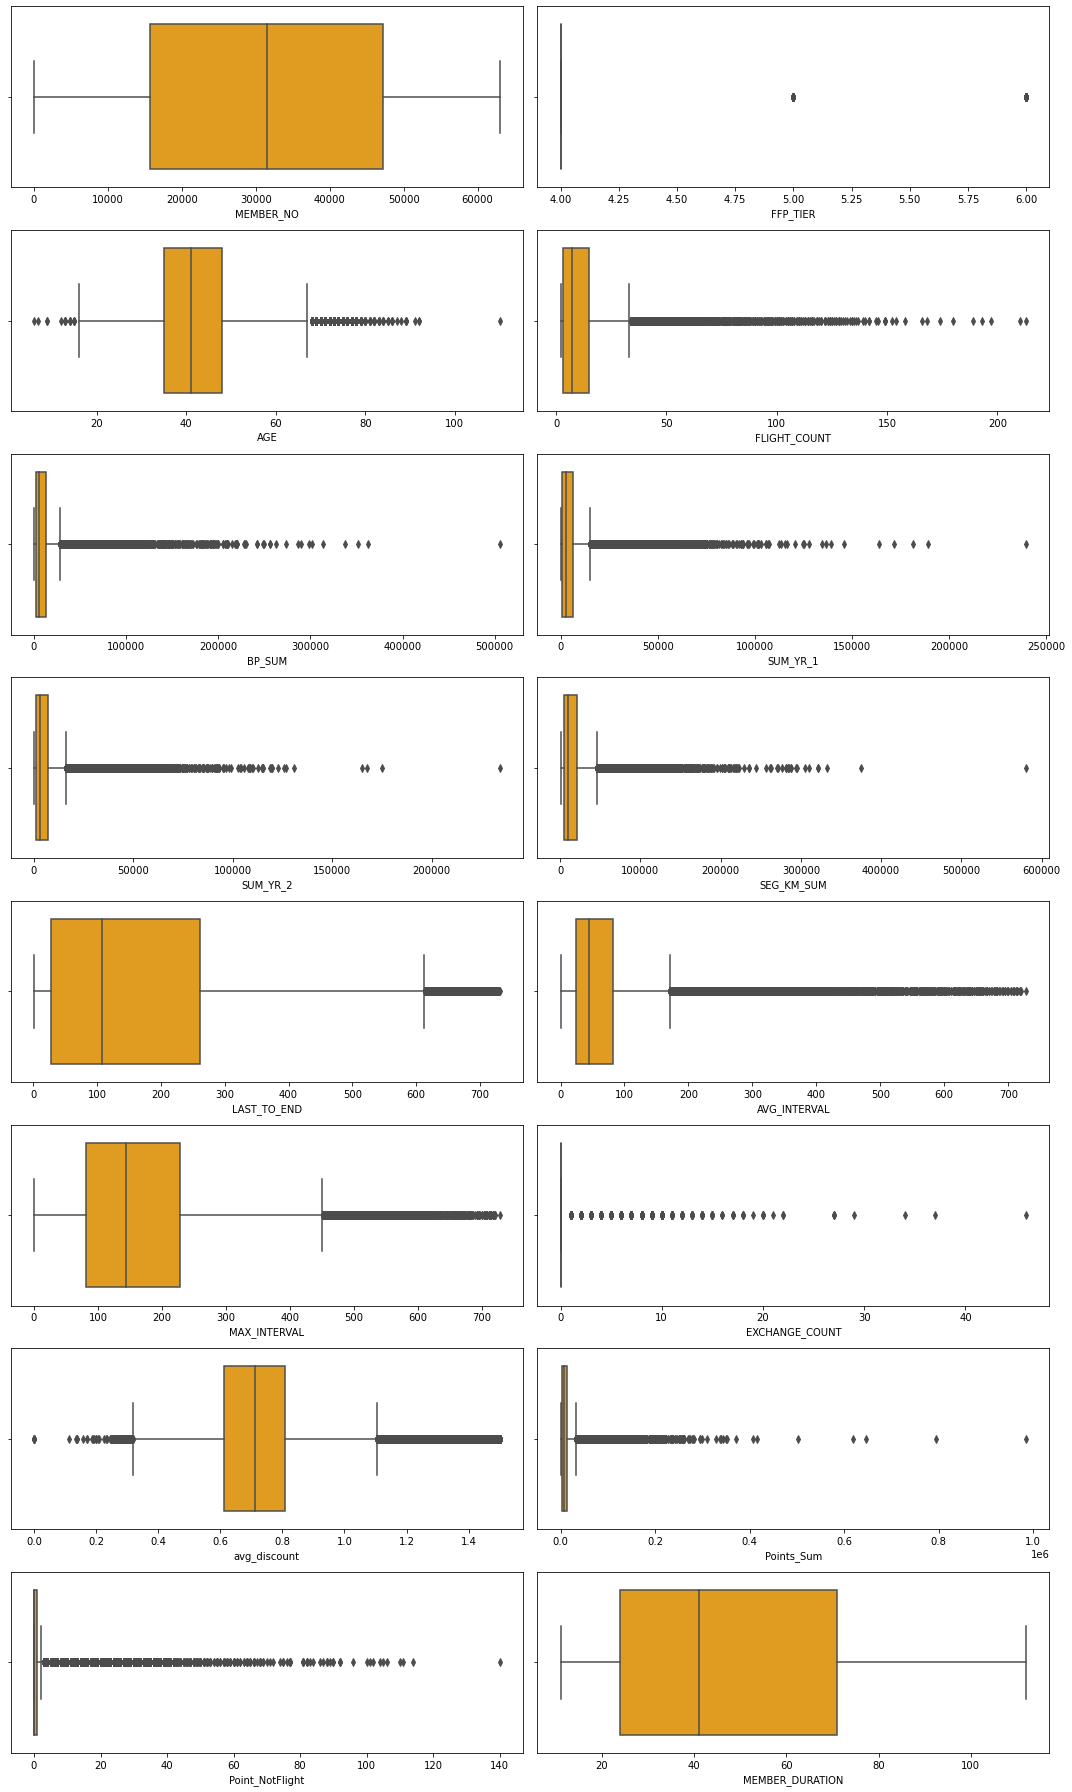

In [28]:
# boxplot visualization for numerical data

plt.figure(figsize=(15, 25))
for i in range(0, len(numeric)):
    plt.subplot(8, 2, i+1)
    sns.boxplot(x=df_clean[numeric[i]], color='orange')
    plt.tight_layout()

plt.show()

Dari observasi boxplot:

**Mayoritas kolom memiliki pencilan**, kecuali kolom MEMBER_NO, FFP_TIER dan MEMBER_DURATION

#### Dist Plot

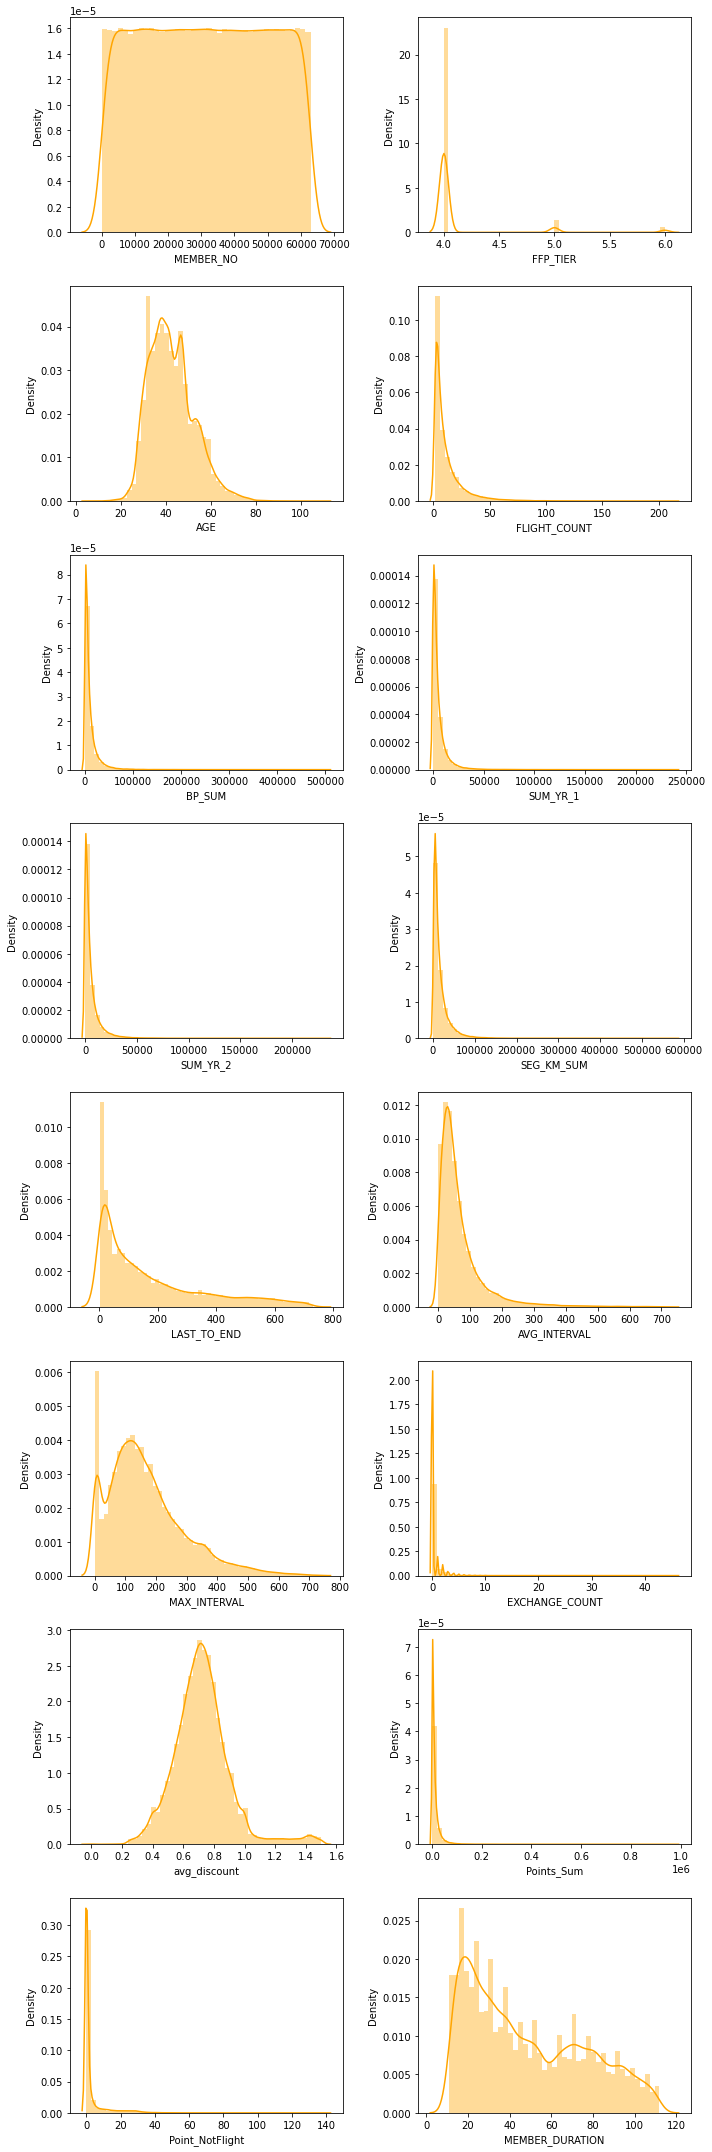

In [29]:
# distribution plot for numerical data

plt.figure(figsize=(10, 30))
for i in range(0, len(numeric)):
    plt.subplot(8, 2,i+1)
    sns.distplot(df_clean[numeric[i]], color='orange')
    plt.tight_layout()

Dari observasi Dist Plot:

**Mayoritas kolom tampaknya memiliki distribusi miring positif**, kecuali untuk kolom MEMBER_NO, FFP_TIER dan avg_discount

#### Count Plot

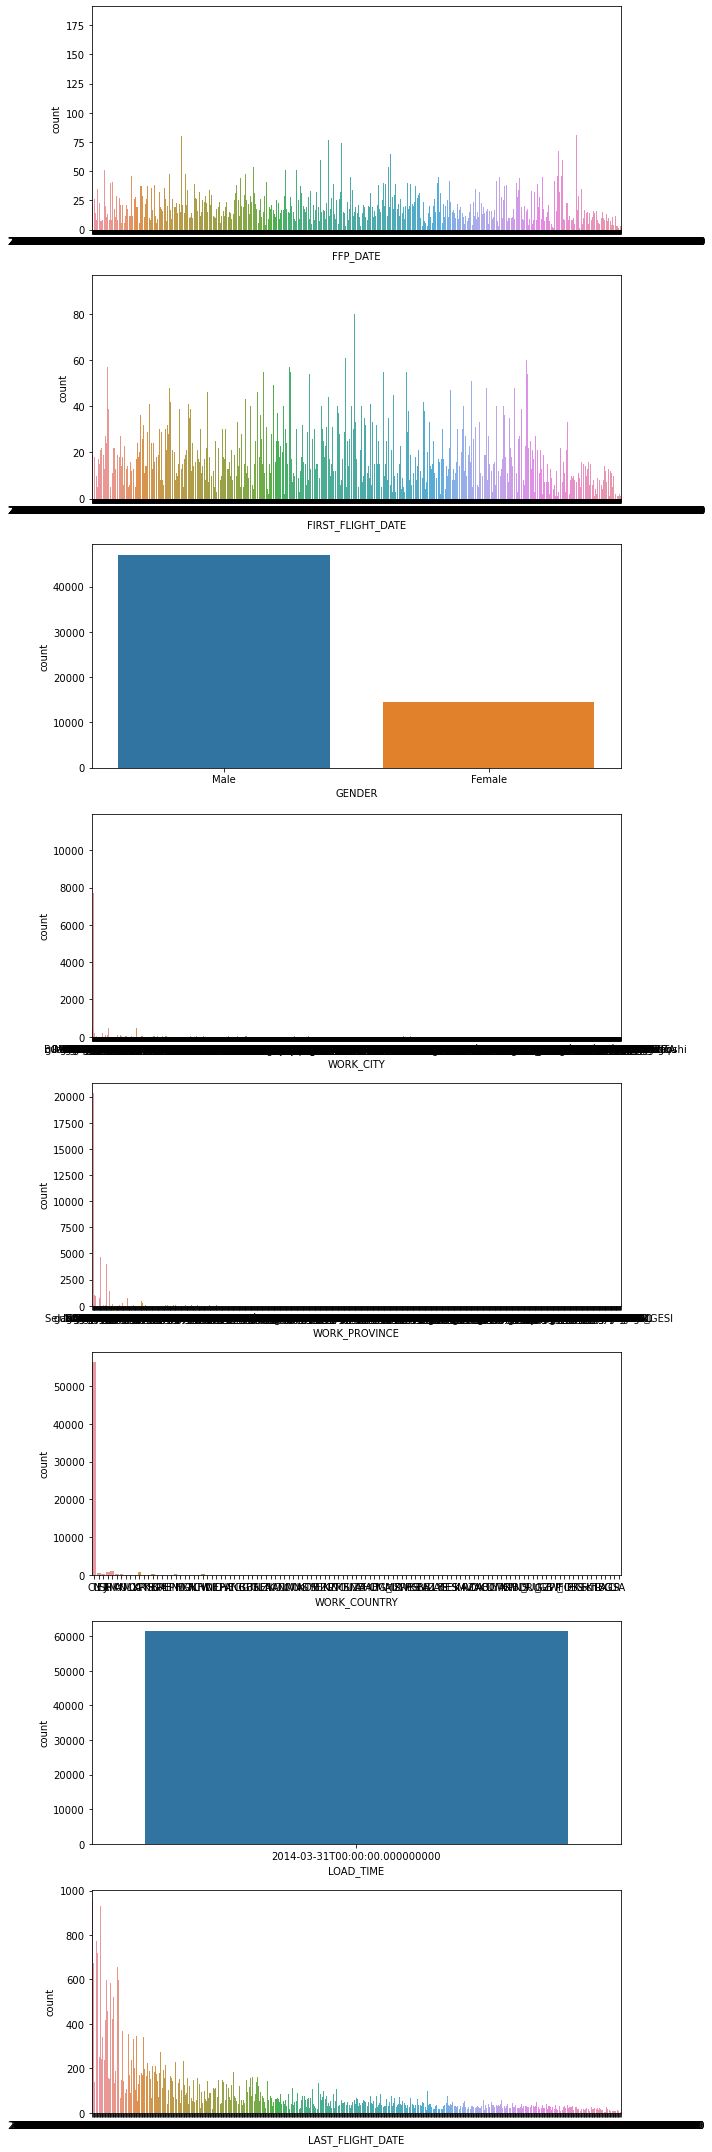

In [30]:
plt.figure(figsize=(10, 30))
for i in range(0, len(categorical)):
    plt.subplot(8, 1, i+1)
    sns.countplot(df_clean[categorical[i]])
    plt.tight_layout()

Dari observasi Count Plot:

- Sebagian besar anggota adalah Laki-laki

- Mayoritas kolom memiliki sejumlah besar nilai unik

- Untuk kolom LOAD_TIME memiliki 1 nilai, yaitu 2014-03-31

### Multivariate Analysis

#### Correlaction/Associations Heat Map

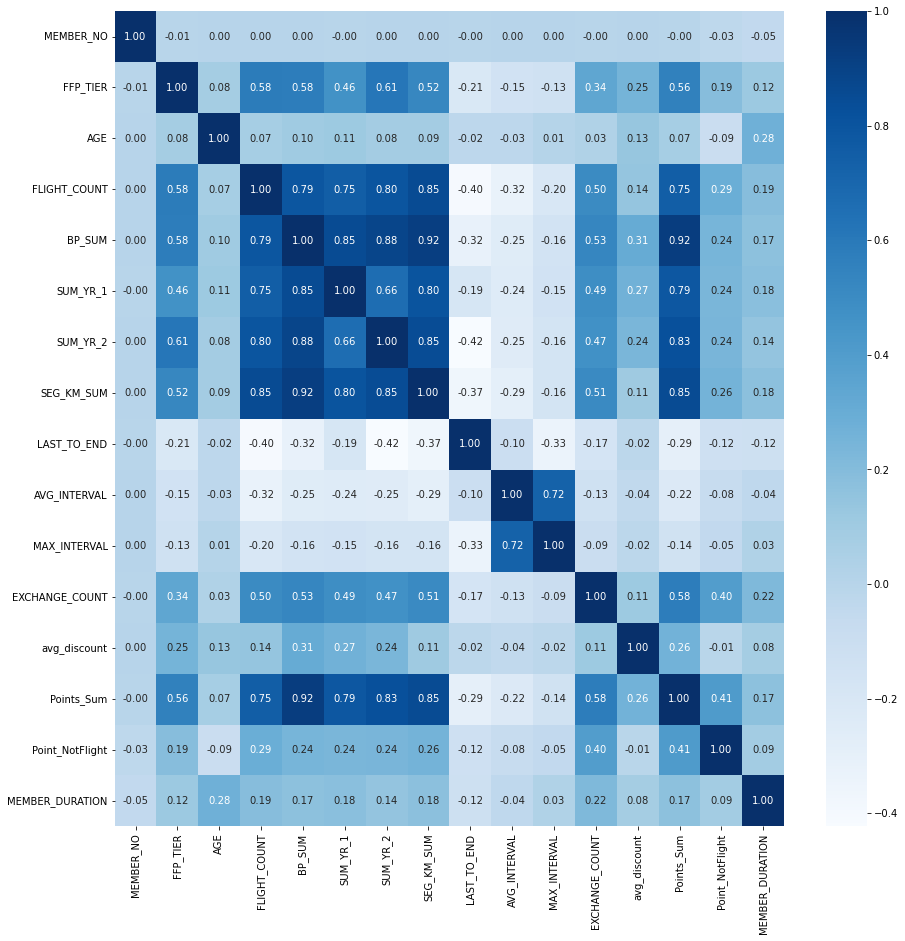

In [32]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_clean.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

Dapat dilihat bahwa ada korelasi antara beberapa atribut, dengan asumsi > 0,5 memiliki korelasi positif yang cukup kuat:

- Korelasi FIRST_FLIGHT_DATE dengan FFP_DATE = 0.86
- Korelasi WORK_PROVINCE dengan WORK_CITY = 0.81
- Korelasi WORK_PROVINCE dengan WORK_COUNTRY = 0.70
- Korelasi WORK_PROVINCE dengan WORK_CITY` = 0.85
- Korelasi BP_SUM dengan FLIGHT_COUNT = 0.79
- Korelasi BP_SUM dengan FFP_TIER = 0.58
- Korelasi BP_SUM dengan EXCHANGE_COUNT = 0.53
- Korelasi FLIGHT_COUNT dengan FFP_TIER = 0.58
- Korelasi SUM_YR_1 dengan FLIGHT_COUNT = 0.75
- Korelasi SUM_YR_1 dengan BP_SUM = 0.85
- Korelasi SUM_YR_1 dengan SUM_YR_2 = 0.66
- Korelasi SUM_YR_1 dengan SEG_KM_SUM = 0.80
- Korelasi SUM_YR_1 dengan Points_Sum = 0.79
- Korelasi SUM_YR_2 dengan FFP_TIER = 0.61
- Korelasi SUM_YR_2 dengan FLIGHT_COUNT = 0.80
- Korelasi SUM_YR_2 dengan BP_SUM = 0.88
- Korelasi SUM_YR_2 dengan SEG_KM_SUM = 0.85
- Korelasi SUM_YR_2 dengan Points_Sum = 0.83
- Korelasi SEG_KM_SUM dengan FFP_TIER = 0.52
- Korelasi SEG_KM_SUM dengan FLIGHT_COUNT = 0.85
- Korelasi SEG_KM_SUM dengan BP_SUM = 0.92
- Korelasi SEG_KM_SUM dengan EXCHANGE_COUNT = 0.51
- Korelasi Points_Sum dengan FFP_TIER = 0.56
- Korelasi Points_Sum dengan FLIGHT_COUNT = 0.75
- Korelasi Points_Sum dengan BP_SUM = 0.92
- Korelasi Points_Sum dengan SEG_KM_SUM = 0.85
- Korelasi Points_Sum dengan EXCHANGE_COUNT = 0.58
- Korelasi MAX_INTERVAL dengan AVG_INTERVAL = 0.72

#### Pair Plot

<Figure size 1080x1080 with 0 Axes>

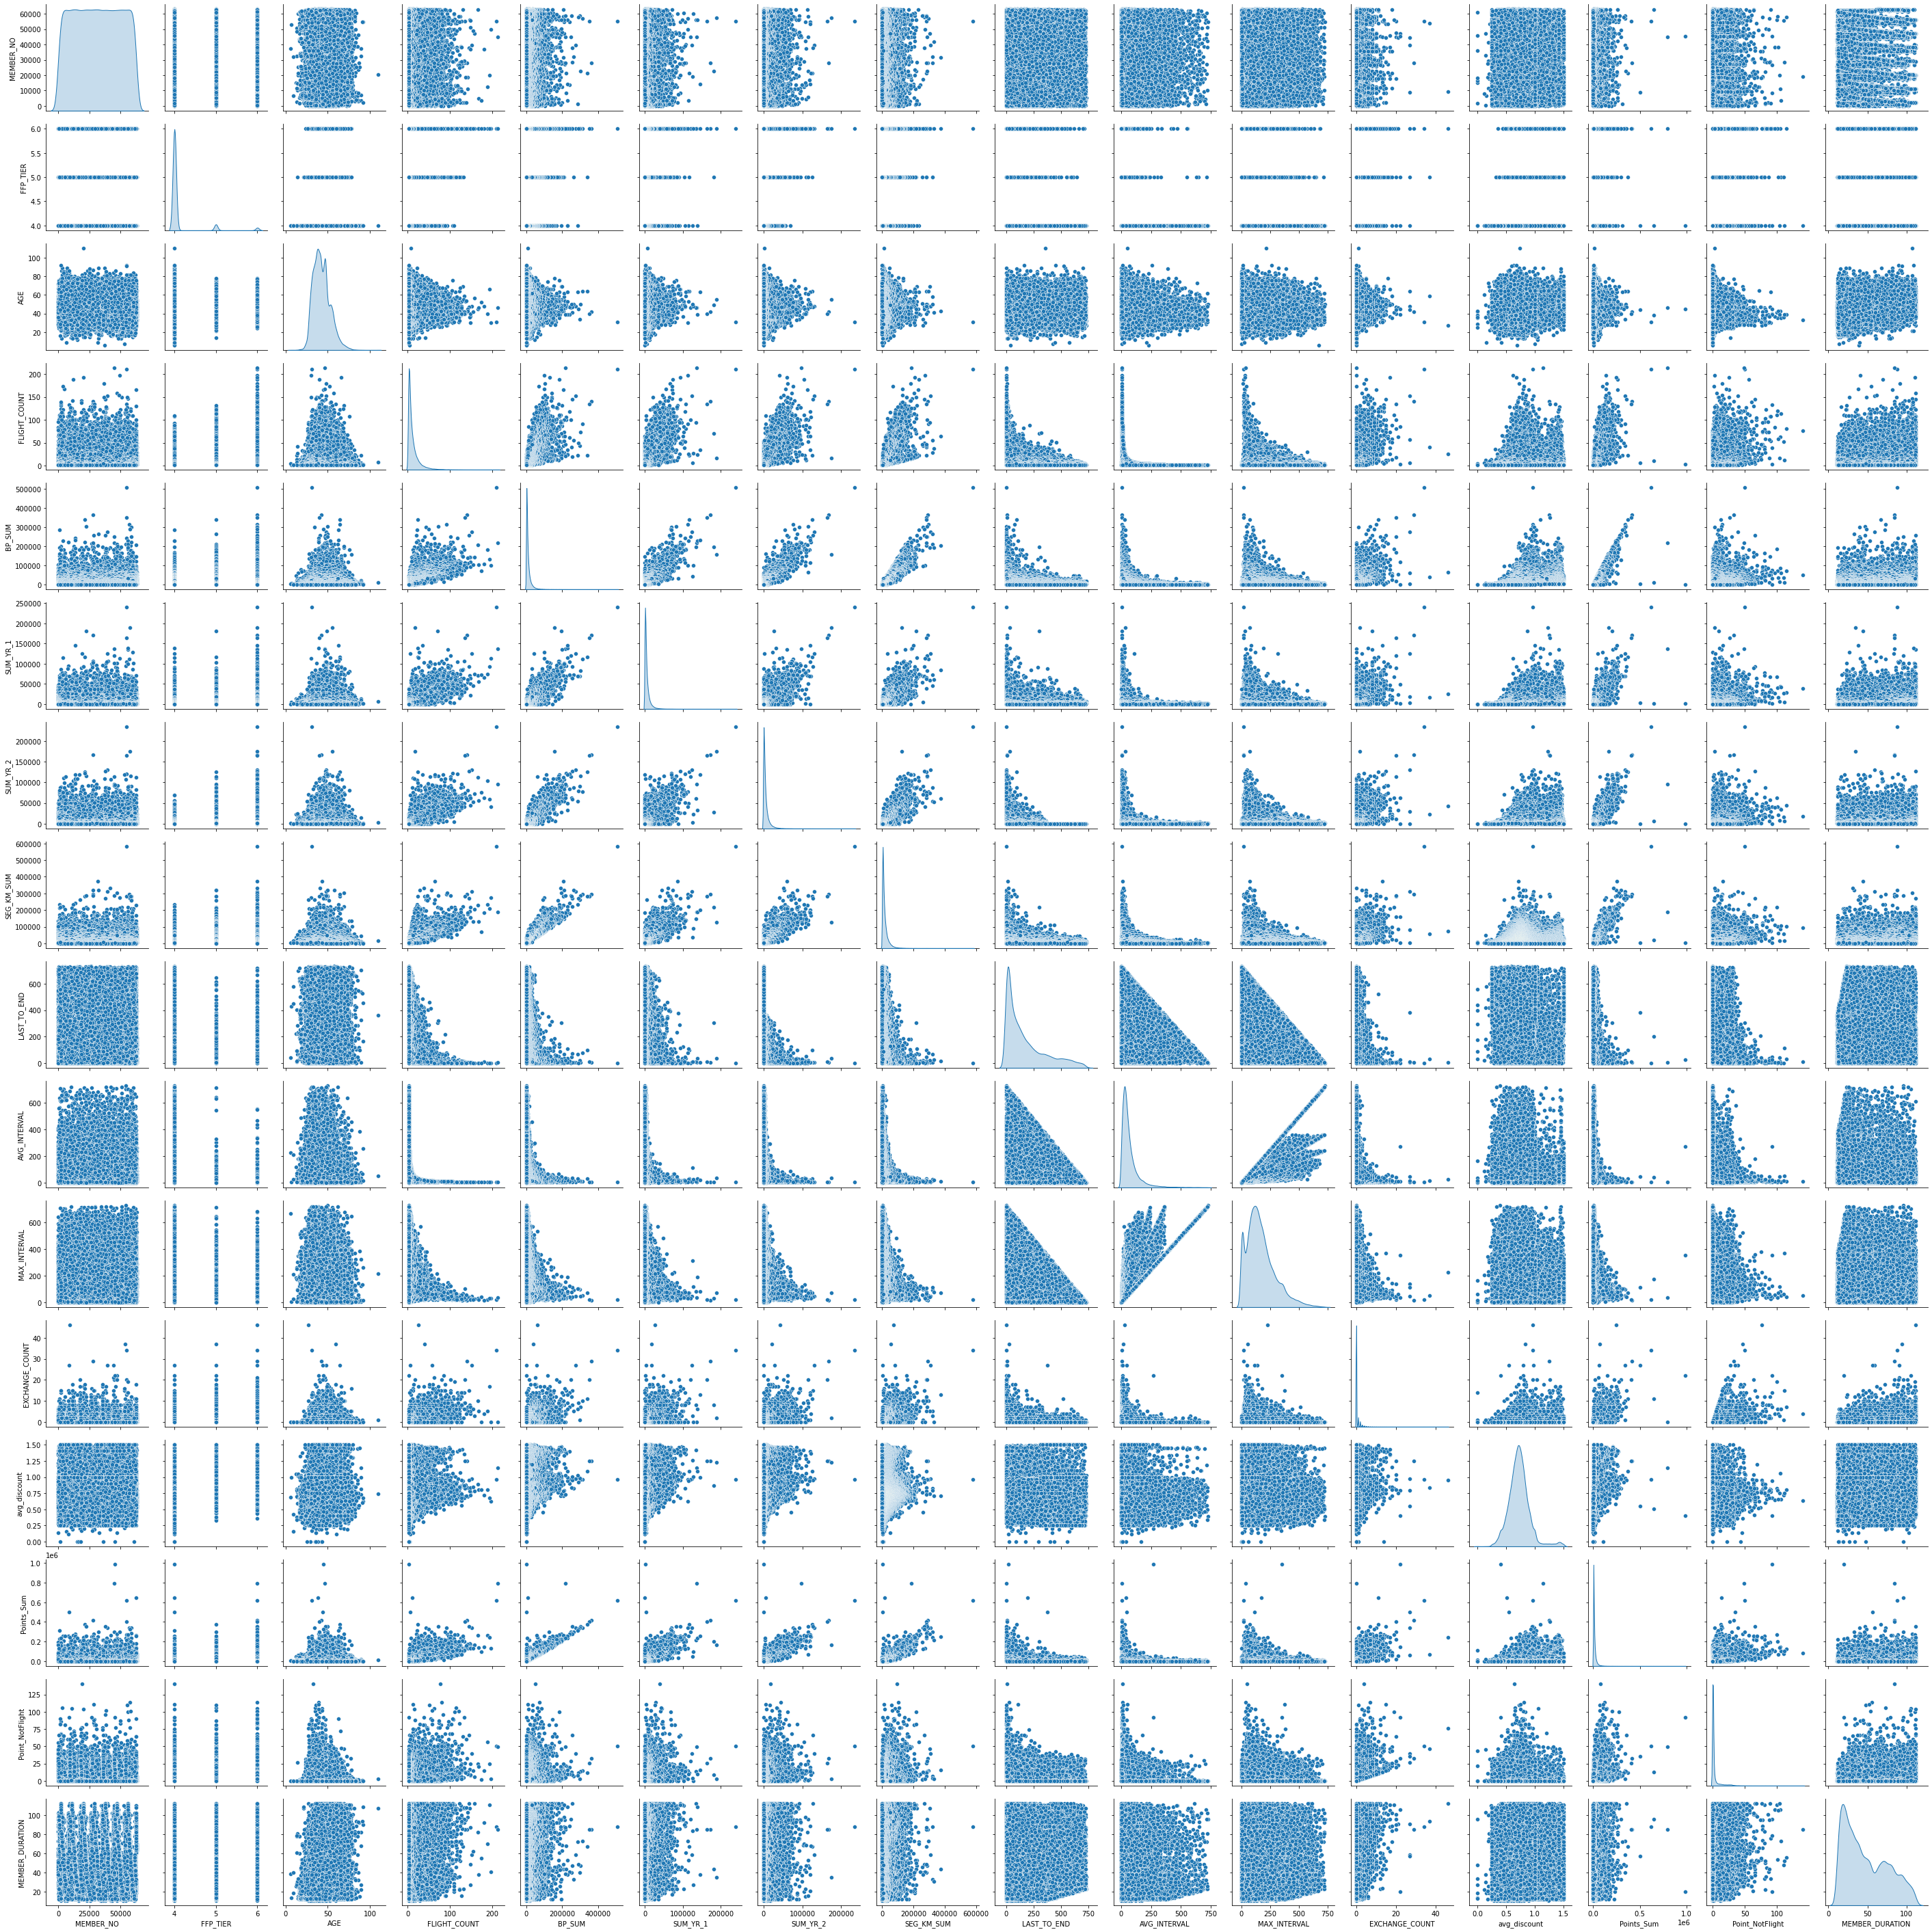

In [33]:
plt.figure(figsize=(15, 15))
sns.pairplot(df_clean, diag_kind='kde')
plt.show()

Di pairplot, dapat dilihat bahwa ada korelasi linier antara beberapa kolom.

## EDA Conclusion

Beberapa hal yang ditemukan dari kumpulan data EDA ini adalah:

- Data terlihat valid dan tidak ada cacat.

- Mayoritas kolom numerik memiliki distribusi miring positif, ini harus diingat jika kita ingin melakukan sesuatu atau menggunakan model yang membutuhkan asumsi distribusi normal.

- Mayoritas kolom numerik juga memiliki pencilan, kecuali untuk kolom FFP_TIER dan MEMBER_DURATION .

- Mayoritas kolom kategoris memiliki sejumlah besar unik kecuali untuk GENDER dan LOAD_TIME . kolom

- Banyak kolom memiliki korelasi positif yang kuat satu sama lain

## Data Pre-Processing Part 2

### Outliers

Dari proses EDA, terlihat bahwa ada pelanggan yang berusia 110 tahun. Dapat dianggap sebagai anomali, oleh karena itu data dihapus.

In [34]:
df_clean[df_clean.AGE > 100]

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER    WORK_CITY  \
23268      20264 2005-04-14        2005-05-18  Female         4  shenzhenshi   

      WORK_PROVINCE WORK_COUNTRY  AGE  LOAD_TIME  ...  SEG_KM_SUM  \
23268     guangdong           CN  110 2014-03-31  ...       14053   

       LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL  MAX_INTERVAL  \
23268        2013-04-06          361     50.333333           214   

      EXCHANGE_COUNT  avg_discount  Points_Sum  Point_NotFlight  \
23268              1      0.740881       11194                3   

       MEMBER_DURATION  
23268              107  

[1 rows x 24 columns]

In [35]:
df_clean.drop(df_clean[df_clean.AGE > 100].index, inplace = True)

Dari hasil pengamatan sebelumnya, terlihat ada kolom harga tiket dengan nilai 0. Kemudian pemeriksaan juga dilakukan pada total jarak penerbangan yang telah dilakukan dan rata-rata diskon yang diperoleh.

Di sini kita dapat melihat bahwa ada data penerbangan dengan harga tiket 0, diskon rata-rata adalah 0, tetapi total jarak penerbangan lebih dari 0. Ini dapat dianggap sebagai anomali, dan karena jumlahnya kecil (7 baris), kita dapat drop baris ini.

In [36]:
df_clean[(df_clean.SUM_YR_1 == 0) & (df_clean.SUM_YR_2 == 0) & (df_clean.avg_discount == 0) & (df_clean.SEG_KM_SUM > 0)]

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER  WORK_CITY  \
62980       1761 2012-08-07        2012-09-09  Female         4   shenzhen   
62981      15206 2011-12-02        2011-12-02  Female         4  guangzhou   
62982      16415 2013-01-20        2013-01-20  Female         4    beijing   
62983      18375 2011-05-20        2013-06-05  Female         4  guangzhou   
62984      36041 2010-03-08        2013-09-14    Male         4     foshan   
62985      45690 2006-03-30        2006-12-02  Female         4  guangzhou   
62986      61027 2013-02-06        2013-02-14  Female         4  guangzhou   

      WORK_PROVINCE WORK_COUNTRY  AGE  LOAD_TIME  ...  SEG_KM_SUM  \
62980     guangdong           CN   29 2014-03-31  ...        6138   
62981     guangdong           CN   42 2014-03-31  ...        2158   
62982             .           CN   35 2014-03-31  ...        3848   
62983     guangdong           CN   25 2014-03-31  ...        1134   
62984     guangdong           CN   38 2014-03-31  ...        8016   
62985     guangdong           CN   43 2014-03-31  ...        2594   
62986     guangdong           CN   36 2014-03-31  ...        3934   

       LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL  MAX_INTERVAL  \
62980        2012-09-21          558          12.0            12   
62981        2013-10-06          178           3.0             3   
62982        2013-01-20          437           0.0             0   
62983        2013-06-09          297           4.0             4   
62984        2014-01-03           89          37.0            60   
62985        2014-03-03           29         166.0           166   
62986        2013-02-26          400          12.0            12   

      EXCHANGE_COUNT  avg_discount  Points_Sum  Point_NotFlight  \
62980              0           0.0           0                0   
62981              0           0.0           0                0   
62982              0           0.0           0                0   
62983              1           0.0       12318               22   
62984             14           0.0      106972               43   
62985              0           0.0           0                0   
62986              0           0.0           0                0   

       MEMBER_DURATION  
62980               19  
62981               27  
62982               14  
62983               34  
62984               48  
62985               96  
62986               13  

[7 rows x 24 columns]

In [37]:
df_clean.drop(df_clean[(df_clean.SUM_YR_1 == 0) & (df_clean.SUM_YR_2 == 0) & (df_clean.avg_discount == 0) & (df_clean.SEG_KM_SUM > 0)].index, inplace = True)

In [38]:
print('Total Row', df_clean.shape[0], ', Total Feature', df_clean.shape[1],'\n')

Total Row 61429 , Total Feature 24 



## Feature Selection

### RFM

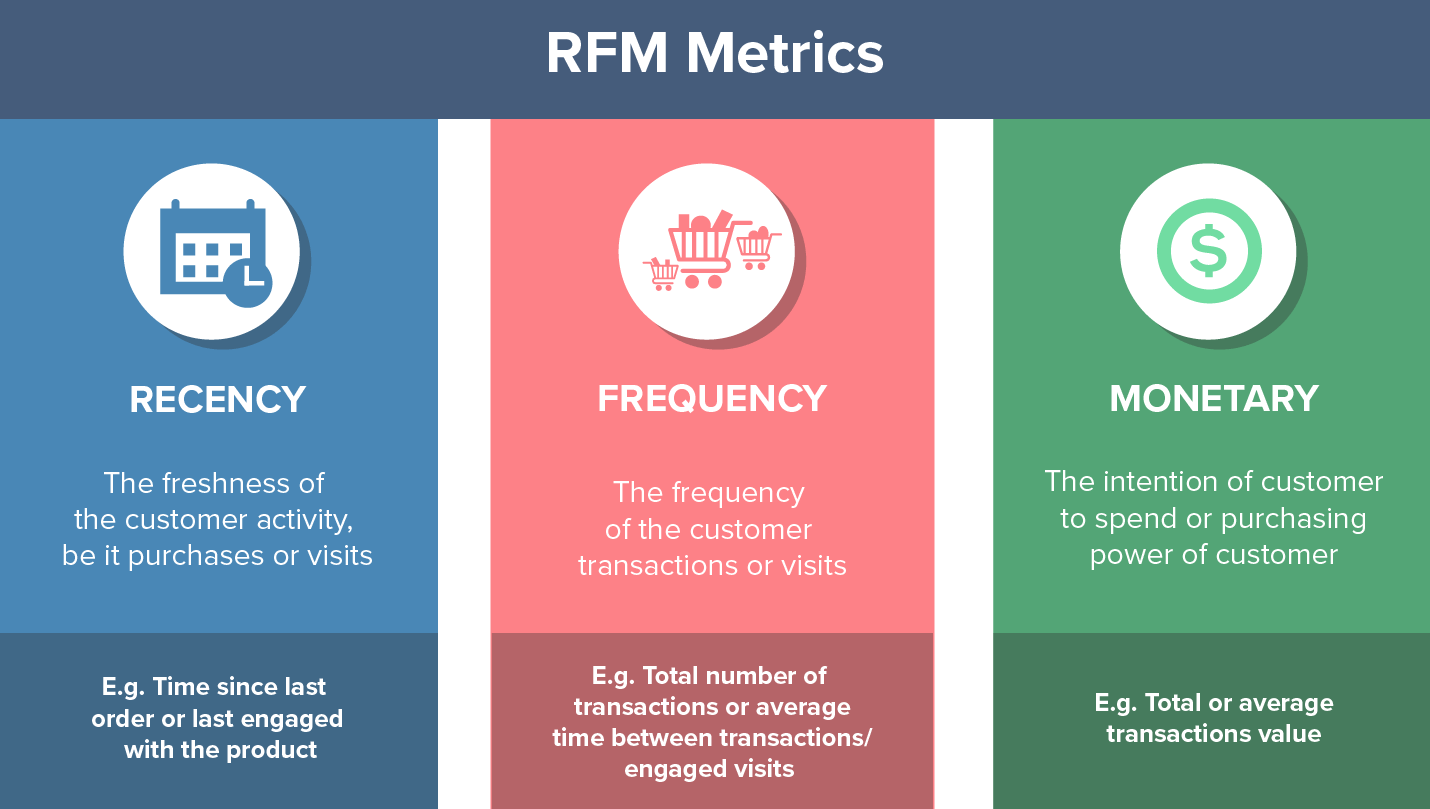

Menggunakan konsep RFM seperti yang ditunjukkan di atas dalam melakukan pemilihan fitur:

- Recency -> kolom LAST_TO_END

  Jarak dari waktu penerbangan terakhir ke pesanan penerbangan terakhir
  
  
- Frekuensi -> kolom FLIGHT_COUNT

  Jumlah penerbangan pelanggan


- Monetary -> kolom SEG_KM_SUM

  Untuk kolom moneter, sebagai penyesuaian dalam bisnis maskapai, fitur ini digantikan oleh akumulasi jam penerbangan dalam jangka waktu tertentu

Lalu ada juga kolom yang dianggap penting dalam menilai nilai pelanggan dalam bisnis penerbangan, yaitu:

- Loyalitas -> kolom MEMBER_DURATION

  Panjang keanggotaan, yang mencerminkan apakah anggota tersebut adalah pelanggan yang sudah ada


- Kabin -> kolom avg_diskon

  Faktor diskon terkait dengan kelas kabin, mencerminkan nilai pelanggan yang tinggi dan rendah

Kolom ini akan digunakan dalam proses pengelompokan

In [39]:
df_select = df_clean.copy()

In [40]:
df_select = df_select[['MEMBER_DURATION','LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM','avg_discount']]
df_select.sample(5)

MEMBER_DURATION  LAST_TO_END  FLIGHT_COUNT  SEG_KM_SUM  avg_discount
44209               77          154             4        7320      0.514014
32408               13            6             9       10212      0.653901
46514               56          554             4        4616      0.725672
27437               21          391             7       13467      0.626706
39967               42          111             3        5054      0.922161

### Normalization/Standarization

Sebelum melakukan clustering, data perlu distandarisasi/dinormalisasi sehingga setiap fitur memiliki skala yang sama. Dalam hal ini normalisasi digunakan, karena data memiliki distribusi miring yang positif.

Untuk kolom avg_discount, akan digunakan standarisasi, karena distribusinya terlihat normal.

In [41]:
# Before scaling
df_select.describe()

MEMBER_DURATION   LAST_TO_END  FLIGHT_COUNT     SEG_KM_SUM  \
count     61429.000000  61429.000000  61429.000000   61429.000000   
mean         48.215761    173.550245     11.940956   17277.610917   
std          27.818950    181.473954     14.119509   21055.460423   
min          11.000000      1.000000      2.000000     368.000000   
25%          24.000000     28.000000      3.000000    4850.000000   
50%          41.000000    107.000000      7.000000   10150.000000   
75%          71.000000    262.000000     15.000000   21433.000000   
max         112.000000    731.000000    213.000000  580717.000000   

       avg_discount  
count  61429.000000  
mean       0.721726  
std        0.184697  
min        0.112043  
25%        0.612569  
50%        0.711807  
75%        0.808997  
max        1.500000

In [42]:
# Normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler

norm_col = ['MEMBER_DURATION', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM']

for col in norm_col:
  df_select[col + '_NORM'] = MinMaxScaler().fit_transform(df_select[col].values.reshape(len(df_select), 1))

# Standardization
df_select['avg_discount_STD'] = StandardScaler().fit_transform(df_select['avg_discount'].values.reshape(len(df_select), 1))

In [43]:
# After scaling
df_select.describe().apply(lambda x: x.apply('{0:.5f}'.format))

MEMBER_DURATION  LAST_TO_END FLIGHT_COUNT    SEG_KM_SUM avg_discount  \
count     61429.00000  61429.00000  61429.00000   61429.00000  61429.00000   
mean         48.21576    173.55024     11.94096   17277.61092      0.72173   
std          27.81895    181.47395     14.11951   21055.46042      0.18470   
min          11.00000      1.00000      2.00000     368.00000      0.11204   
25%          24.00000     28.00000      3.00000    4850.00000      0.61257   
50%          41.00000    107.00000      7.00000   10150.00000      0.71181   
75%          71.00000    262.00000     15.00000   21433.00000      0.80900   
max         112.00000    731.00000    213.00000  580717.00000      1.50000   

      MEMBER_DURATION_NORM LAST_TO_END_NORM FLIGHT_COUNT_NORM SEG_KM_SUM_NORM  \
count          61429.00000      61429.00000       61429.00000     61429.00000   
mean               0.36847          0.23637           0.04711         0.02914   
std                0.27544          0.24859           0.06692         0.03628   
min                0.00000          0.00000           0.00000         0.00000   
25%                0.12871          0.03699           0.00474         0.00772   
50%                0.29703          0.14521           0.02370         0.01686   
75%                0.59406          0.35753           0.06161         0.03630   
max                1.00000          1.00000           1.00000         1.00000   

      avg_discount_STD  
count      61429.00000  
mean           0.00000  
std            1.00001  
min           -3.30102  
25%           -0.59101  
50%           -0.05371  
75%            0.47251  
max            4.21383

### Initialize df_select_std

In [44]:
df_select_std = df_select.copy()
df_select_std = df_select_std[['MEMBER_DURATION_NORM', 'LAST_TO_END_NORM', 'FLIGHT_COUNT_NORM', 'SEG_KM_SUM_NORM', 'avg_discount_STD']]

In [45]:
df_select_std.sample(5)

MEMBER_DURATION_NORM  LAST_TO_END_NORM  FLIGHT_COUNT_NORM  \
52315              0.237624          0.630137           0.000000   
61038              0.079208          0.826027           0.000000   
20772              0.198020          0.095890           0.061611   
13632              0.306931          0.026027           0.085308   
46578              0.227723          0.063014           0.028436   

       SEG_KM_SUM_NORM  avg_discount_STD  
52315         0.005722         -0.370370  
61038         0.002001         -0.117633  
20772         0.029029         -0.200724  
13632         0.036876          0.384202  
46578         0.010969         -1.222094

# Clustering

### Inertia/Elbow method

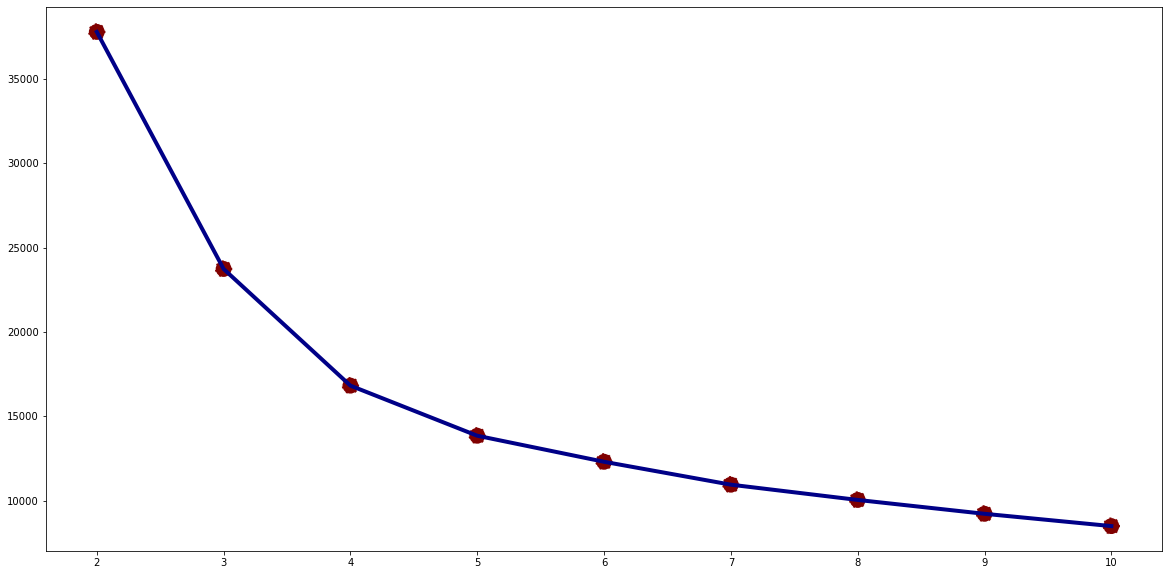

In [46]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_select_std)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(20, 10))

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')
plt.show()

Informasi yang diperoleh jumlah klaster ideal adalah 3 klaster.

### Create Clusters

Buat klaster menggunakan metode K-Means.

In [47]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_select_std)

Tetapkan Cluster ke Dataset

In [48]:
clusters = kmeans.labels_

In [49]:
df_clean['clusters'] = clusters

In [50]:
df_clean.sample(5)

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER  WORK_CITY  \
7168       44066 2013-01-27        2013-01-27    Male         4     ningbo   
34433      29222 2005-06-22        2005-07-25    Male         4  guangzhou   
34126      46723 2012-02-11        2012-08-22  Female         4   hangzhou   
59091      46762 2012-03-25        2012-10-27    Male         4  guangzhou   
13547      14259 2011-06-12        2011-06-12    Male         4    chengdu   

      WORK_PROVINCE WORK_COUNTRY  AGE  LOAD_TIME  ...  LAST_FLIGHT_DATE  \
7168       zhejiang           CN   44 2014-03-31  ...        2014-03-18   
34433     guangdong           CN   50 2014-03-31  ...        2013-11-07   
34126      zhejiang           CN   40 2014-03-31  ...        2013-07-20   
59091     guangdong           TW   42 2014-03-31  ...        2013-05-05   
13547       sichuan           CN   34 2014-03-31  ...        2014-03-11   

       LAST_TO_END  AVG_INTERVAL  MAX_INTERVAL  EXCHANGE_COUNT avg_discount  \
7168            14     16.000000            46               0     0.694582   
34433          146    186.333333           489               0     0.766063   
34126          256     47.428571           237               0     0.681563   
59091          332     95.000000           187               0     0.536777   
13547           21     41.500000           117               0     0.727659   

       Points_Sum  Point_NotFlight  MEMBER_DURATION  clusters  
7168        18170                0               14         1  
34433        5623                0              105         1  
34126        5312                0               25         0  
59091        2397                1               24         0  
13547       11552                0               33         1  

[5 rows x 25 columns]

## Clusters Analysis

### Dimensionality Reduction for Visualization

In [57]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=2)

pca.fit(df_select_std)
pcs = pca.transform(df_select_std)

df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca.head()

PC 1      PC 2
0  1.322036  0.536434
1  2.889383  0.421894
2  2.901836  0.416626
3  2.005285  0.185232
4  1.359489  0.235990

In [58]:
df_pca['clusters'] = clusters
df_pca.head(2)

PC 1      PC 2  clusters
0  1.322036  0.536434         1
1  2.889383  0.421894         2

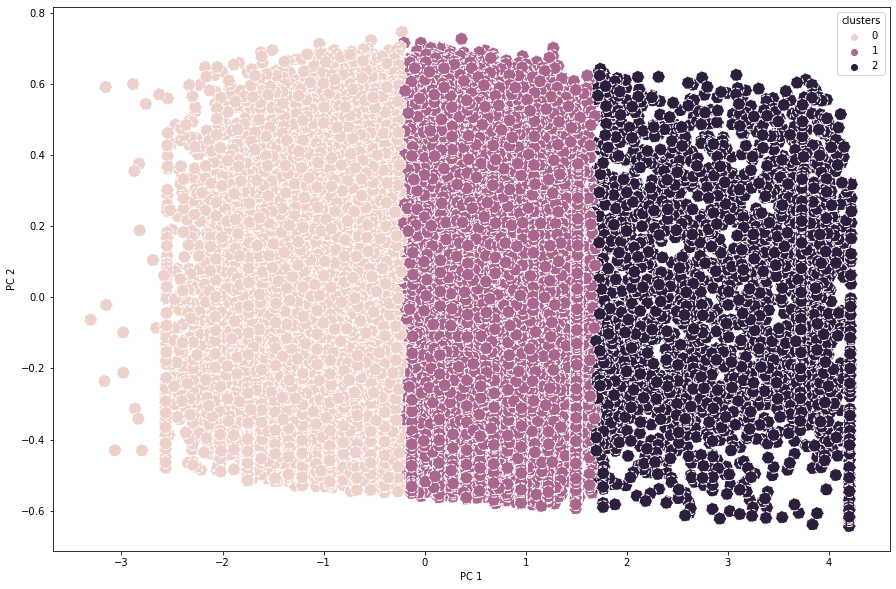

In [59]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x='PC 1', y='PC 2',
    hue='clusters',
    linestyle='--',
    data=df_pca,
    s=160,
    ax=ax
)

plt.show()

### Analysis

In [63]:
df_clean[['MEMBER_DURATION', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'avg_discount', 'clusters']].groupby('clusters').agg(['mean','median'])

MEMBER_DURATION        LAST_TO_END        FLIGHT_COUNT         \
                    mean median        mean median         mean median   
clusters                                                                 
0              46.332954   39.0  178.479485  115.0     9.544701    6.0   
1              49.088256   43.0  171.568754  102.0    13.442151    8.0   
2              55.513953   53.0  150.526744   78.0    16.173643    9.0   

            SEG_KM_SUM          avg_discount            
                  mean   median         mean    median  
clusters                                                
0         14835.378460   9133.0     0.566379  0.590000  
1         18632.991192  10876.5     0.797840  0.781153  
2         23850.721318  12891.5     1.270512  1.274090

In [65]:
df_clean['clusters'].value_counts()

1    33380
0    25469
2     2580
Name: clusters, dtype: int64

**Cluster 0 (pelanggan bernilai rendah)**:

- Kebaruan penerbangan tingkat tertinggi (terpanjang)

- Frekuensi penerbangan tingkat terendah

- Tingkat jarak tempuh maskapai penerbangan terendah

- Dalam tingkat diskon rata-rata, itu menunjukkan kelas penerbangan tingkat bawah

- Durasi keanggotaan terbaru

- Jumlah tengah anggota klaster

- Maskapai penerbangan perlu meningkatkan interaksi dengan pelanggan ini dan perlu mengambil strategi pemasaran tertentu untuk memperpanjang siklus pelanggan ini

**Cluster 1 (pelanggan bernilai menengah)**:

- Kebaruan penerbangan tingkat menengah

- Frekuensi penerbangan tingkat menengah

- Jarak tempuh maskapai tingkat menengah

- Tingkat menengah dari diskon rata-rata, menunjukkan tingkat menengah kelas penerbangan

- Durasi keanggotaan antara klaster 1 dan klaster 2

- Jumlah anggota klaster tertinggi

- Sebagai pelanggan potensial, maskapai penerbangan dapat mendorong pelanggan ini untuk meningkatkan transaksi

**Cluster 2 (pelanggan bernilai tinggi)**:

- Kebaruan penerbangan tingkat terendah (terbaru)

- Tingkat frekuensi penerbangan tertinggi

- Tingkat tertinggi dari jarak tempuh maskapai penerbangan

- Tingkat tertinggi dari diskon rata-rata, menunjukkan tingkat tertinggi dari kelas penerbangan

- Durasi keanggotaan terpanjang

- Jumlah anggota klaster terendah

- Mereka adalah tipe pelanggan yang paling ideal, mereka berkontribusi paling banyak untuk maskapai. Mereka juga setia. Maskapai penerbangan perlu menyediakan manajemen khusus untuk pelanggan ini dan meningkatkan kepuasan mereka